In [1]:
import pandas as pd
from datetime import timedelta
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

In [2]:
df = pd.read_csv('dst/dst2001_2017.csv')[['ut1_unix', 'ut2_unix', 'dst']]
df['time'] = 0.5*(df['ut1_unix'] + df['ut2_unix'])
df['datetime'] = pd.to_datetime(df['time'], unit='s')
df = df.set_index('datetime').drop(['ut1_unix', 'ut2_unix', 'time'], axis=1)
df

,dst
datetime,
2001-01-01 00:30:00,-6.0
2001-01-01 01:30:00,-2.0
2001-01-01 02:30:00,2.0
2001-01-01 03:30:00,4.0
2001-01-01 04:30:00,1.0
...,...
2016-12-31 19:30:00,-19.0
2016-12-31 20:30:00,-25.0
2016-12-31 21:30:00,-24.0


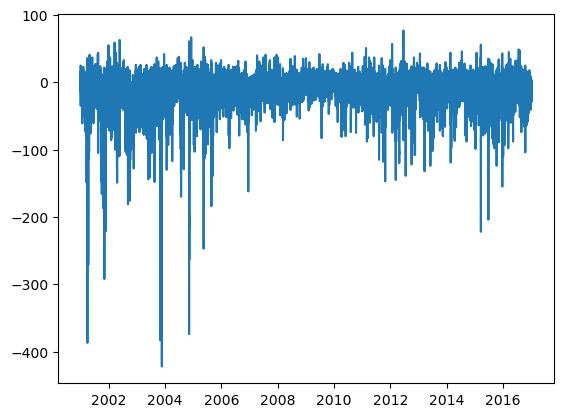

In [3]:
plt.plot(df['dst'])

In [4]:
df['storm'] = df['dst'] < -50
df['major_storm'] = df['dst'] < -100
df

,dst,storm,major_storm
datetime,,,
2001-01-01 00:30:00,-6.0,False,False
2001-01-01 01:30:00,-2.0,False,False
2001-01-01 02:30:00,2.0,False,False
2001-01-01 03:30:00,4.0,False,False
2001-01-01 04:30:00,1.0,False,False
...,...,...,...
2016-12-31 19:30:00,-19.0,False,False
2016-12-31 20:30:00,-25.0,False,False
2016-12-31 21:30:00,-24.0,False,False


In [5]:
has_major_peak = set()
current_storm_no = 1
previous_storm = False
for ix, row in tqdm(df.iterrows()):
    if not row['storm']:
        if not previous_storm:
            continue
        else:
            previous_storm = False
            current_storm_no += 1     
            continue
    else:
        if previous_storm:
            df.loc[ix, 'storm_no'] = current_storm_no
            if row['major_storm']:
                has_major_peak.add(current_storm_no)
                continue           
        else:
            previous_storm = True
            df.loc[ix, 'storm_no'] = current_storm_no
            if row['major_storm']:
                has_major_peak.add(current_storm_no)
                continue

140396it [00:06, 20119.75it/s]


Storm peak length: 2 days 06:00:00


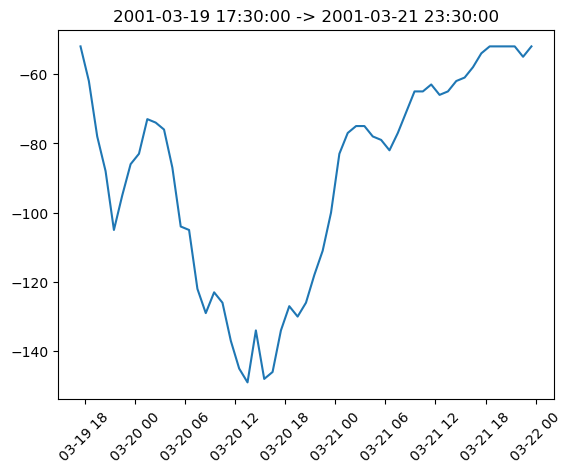

Storm peak length: 2 days 13:00:00


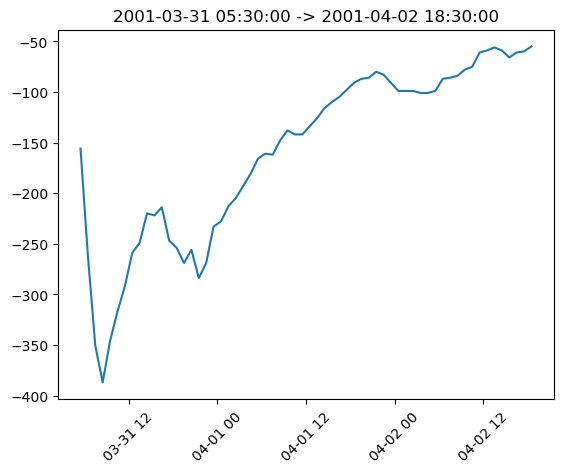

Storm peak length: 1 days 14:00:00


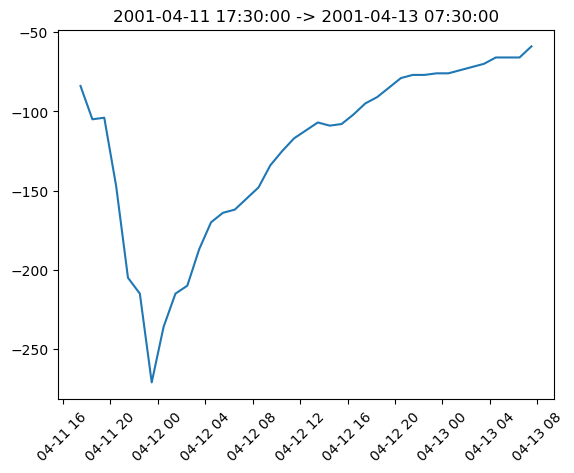

Storm peak length: 1 days 01:00:00


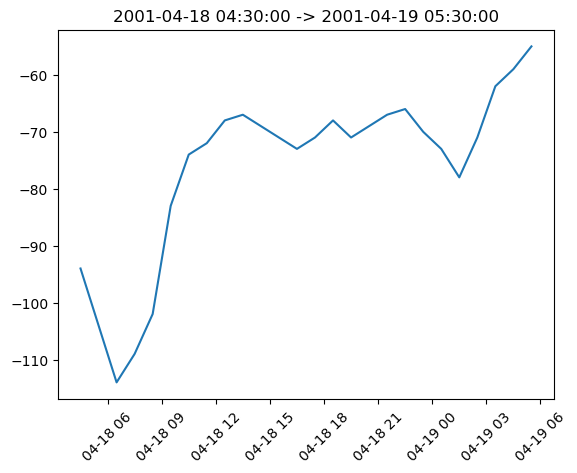

Storm peak length: 1 days 03:00:00


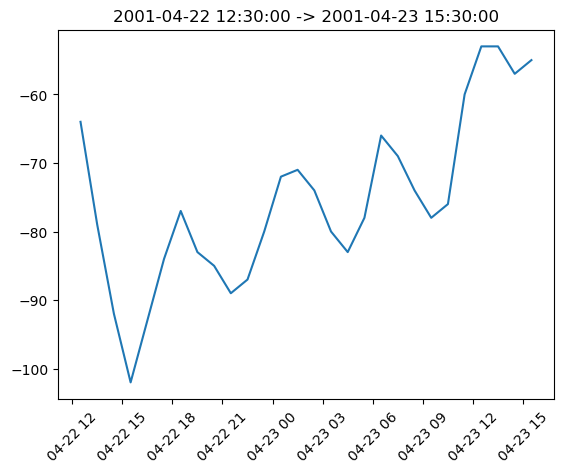

Storm peak length: 0 days 10:00:00


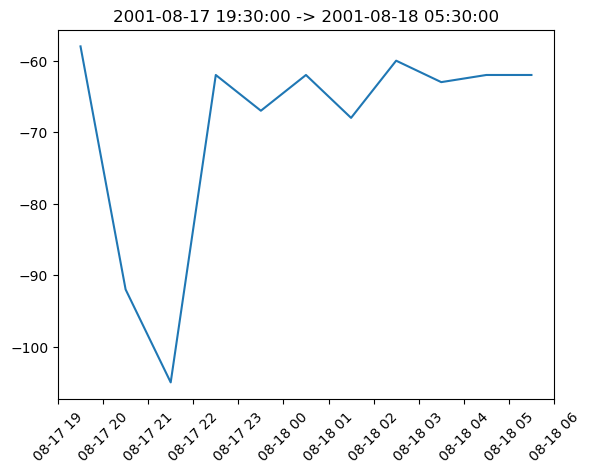

Storm peak length: 0 days 20:00:00


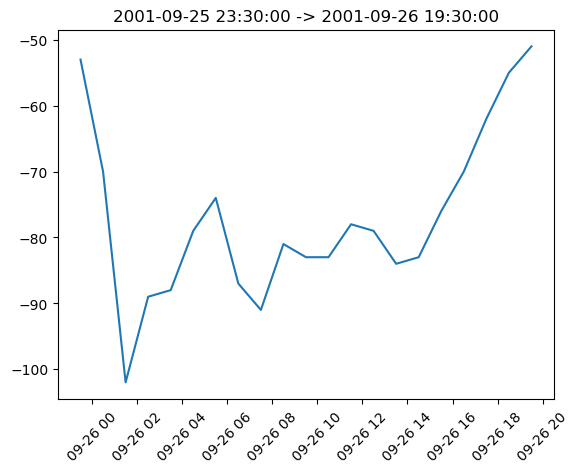

Storm peak length: 2 days 05:00:00


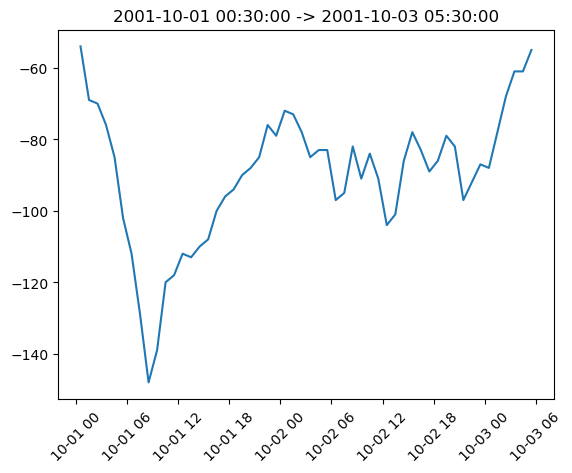

Storm peak length: 1 days 13:00:00


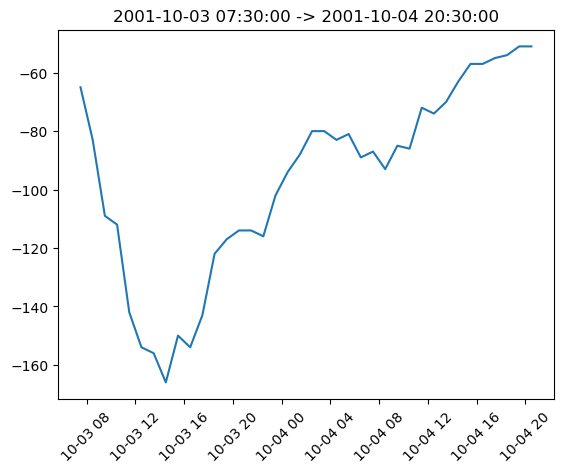

Storm peak length: 2 days 17:00:00


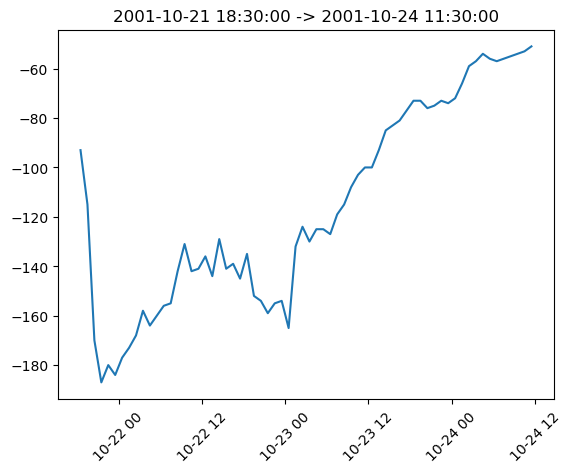

Storm peak length: 1 days 18:00:00


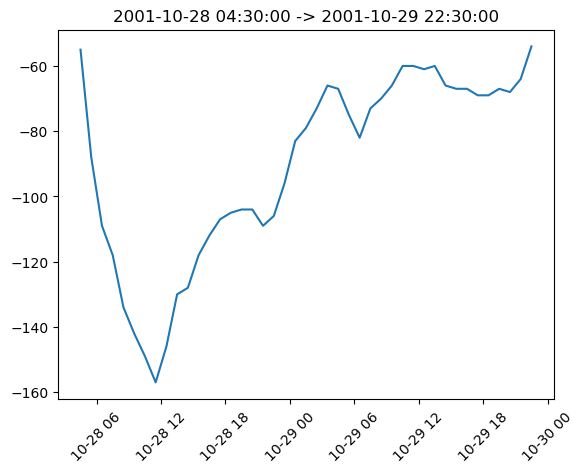

Storm peak length: 1 days 02:00:00


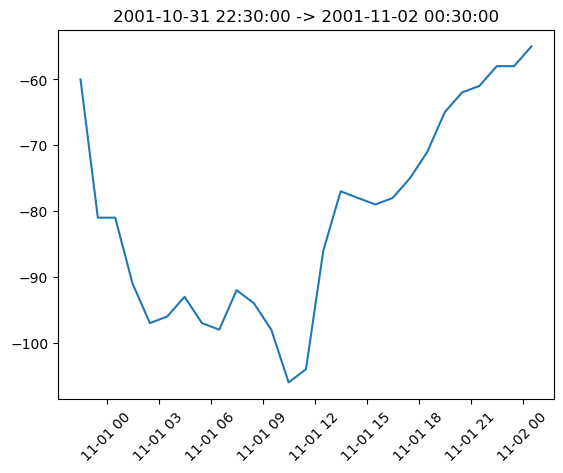

Storm peak length: 2 days 14:00:00


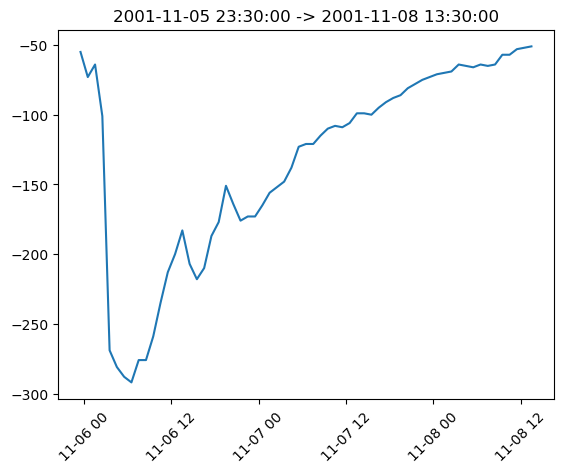

Storm peak length: 2 days 06:00:00


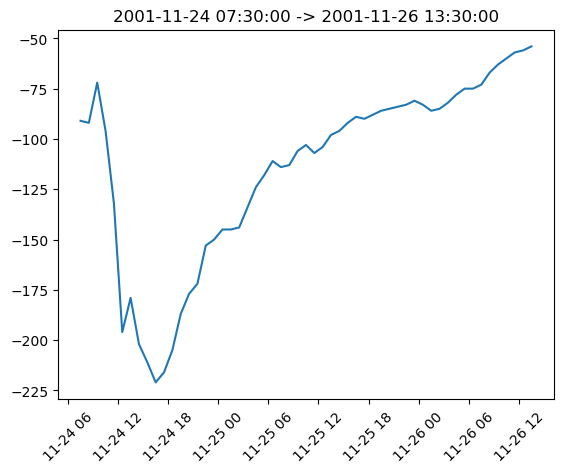

Storm peak length: 1 days 11:00:00


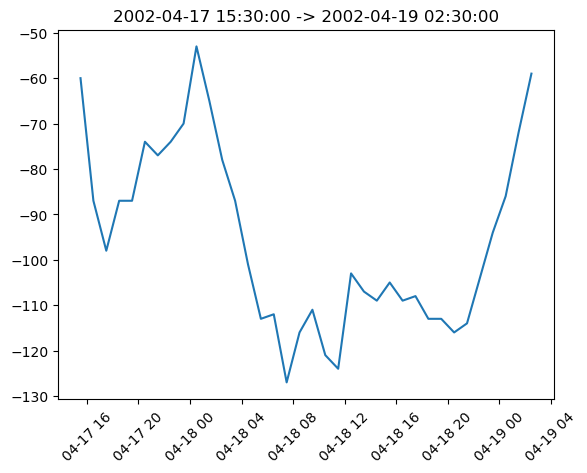

Storm peak length: 1 days 18:00:00


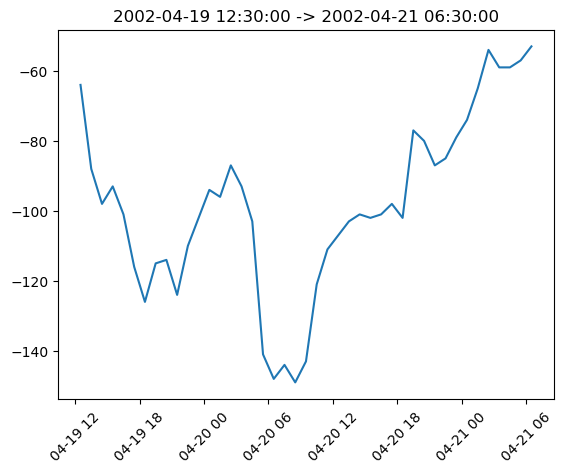

Storm peak length: 0 days 19:00:00


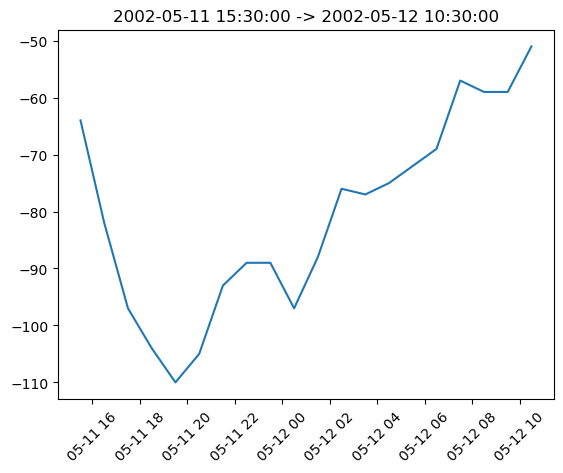

Storm peak length: 1 days 04:00:00


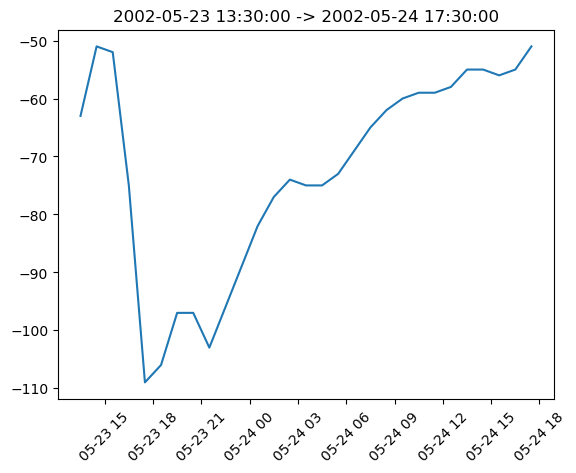

Storm peak length: 0 days 08:00:00


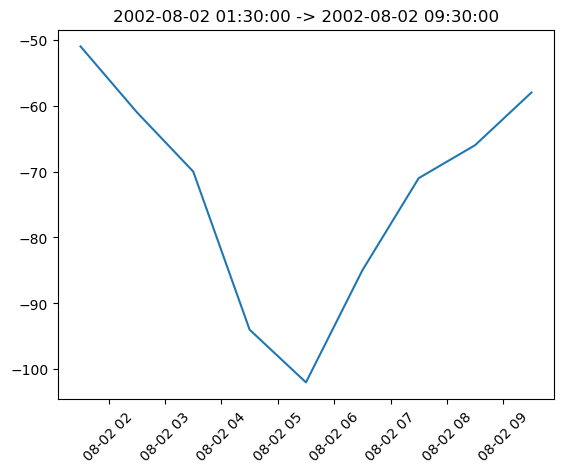

Storm peak length: 0 days 23:00:00


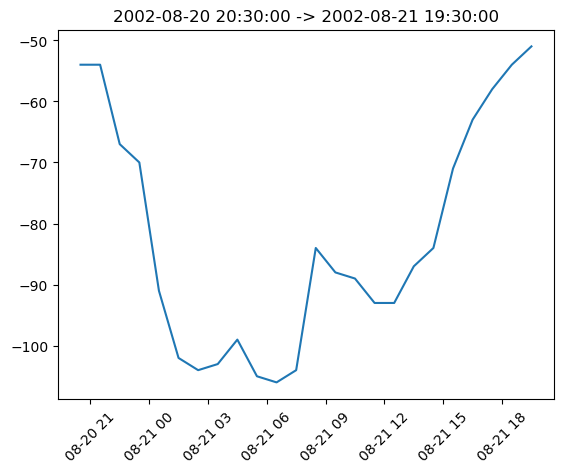

Storm peak length: 0 days 21:00:00


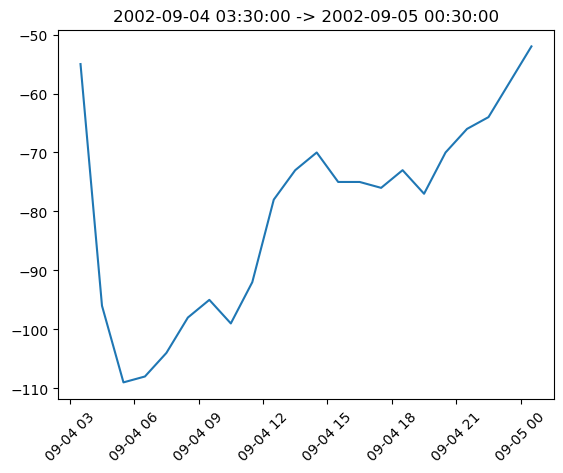

Storm peak length: 1 days 16:00:00


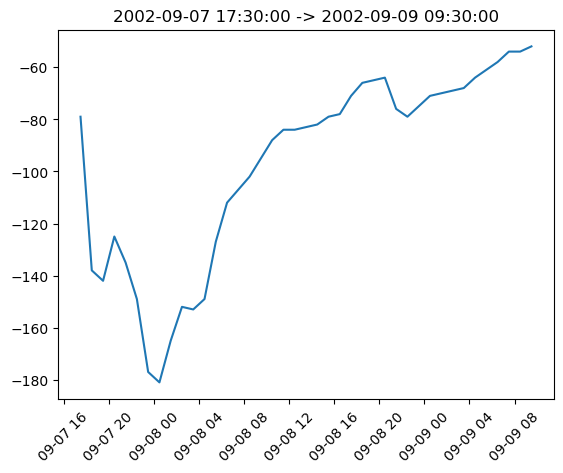

Storm peak length: 1 days 23:00:00


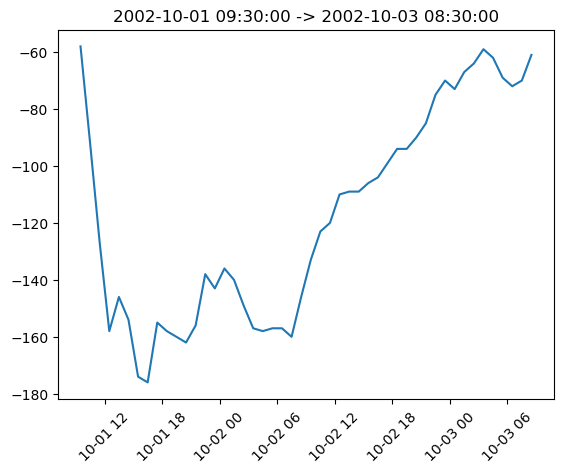

Storm peak length: 2 days 23:00:00


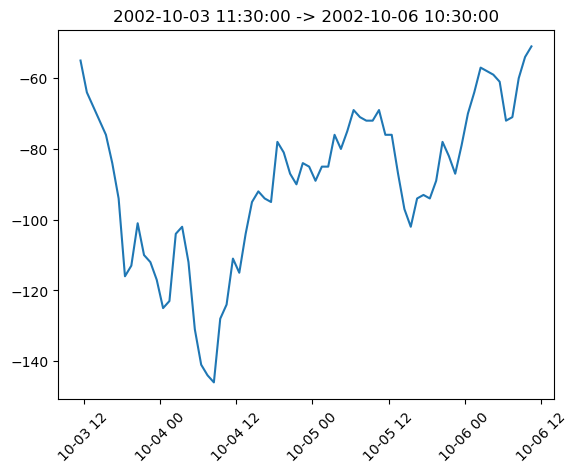

Storm peak length: 2 days 07:00:00


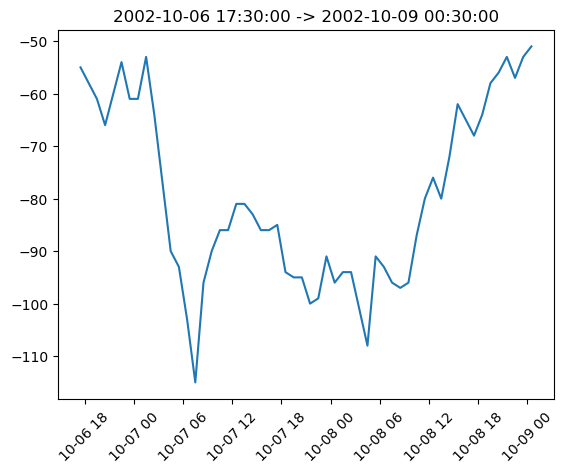

Storm peak length: 1 days 01:00:00


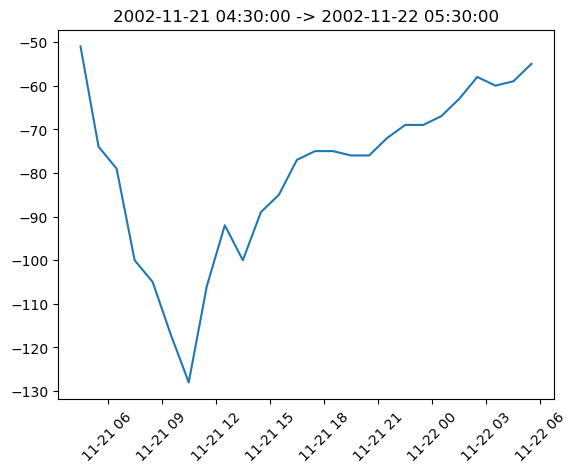

Storm peak length: 0 days 19:00:00


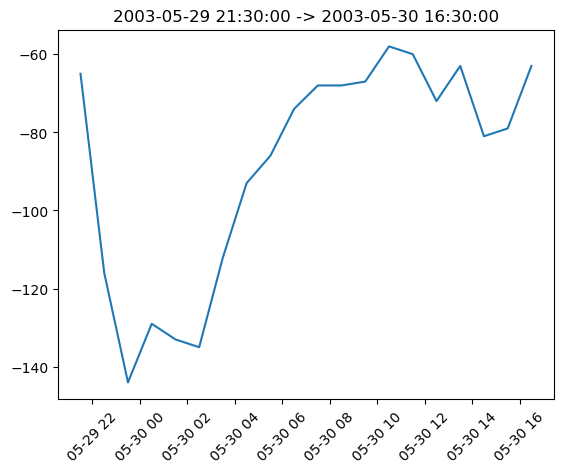

Storm peak length: 0 days 21:00:00


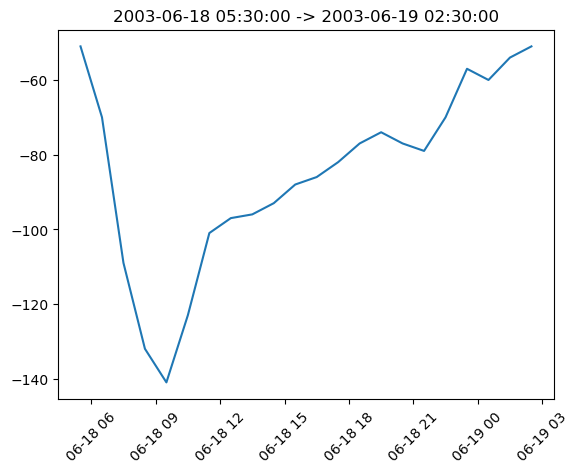

Storm peak length: 0 days 23:00:00


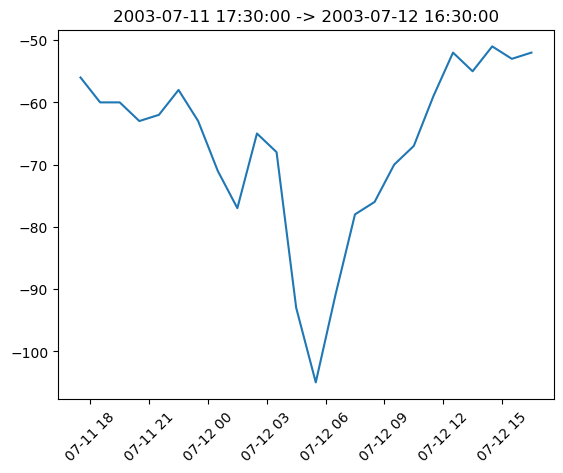

Storm peak length: 1 days 06:00:00


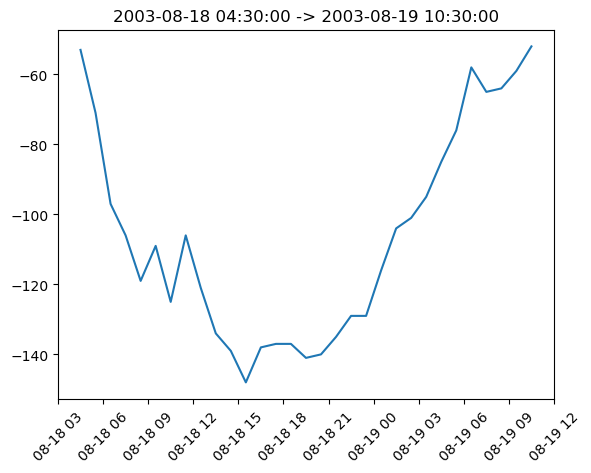

Storm peak length: 2 days 23:00:00


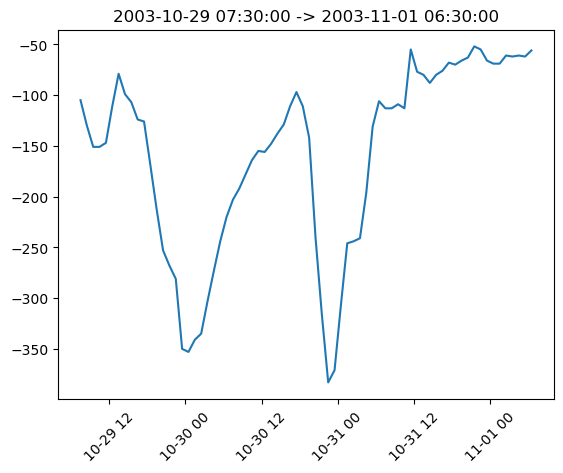

Storm peak length: 1 days 20:00:00


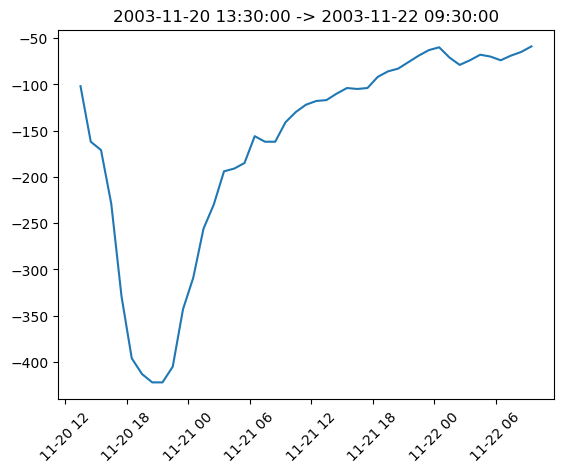

Storm peak length: 0 days 22:00:00


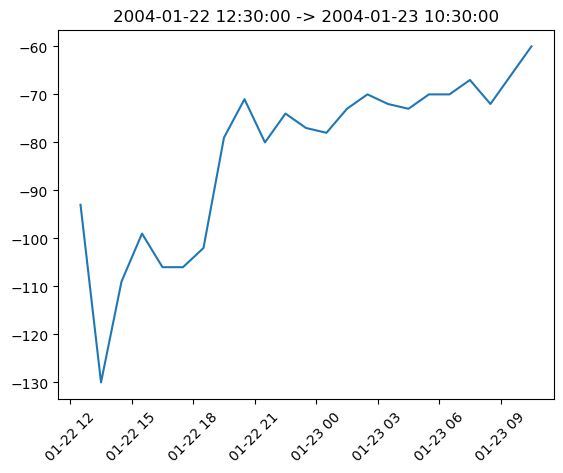

Storm peak length: 0 days 13:00:00


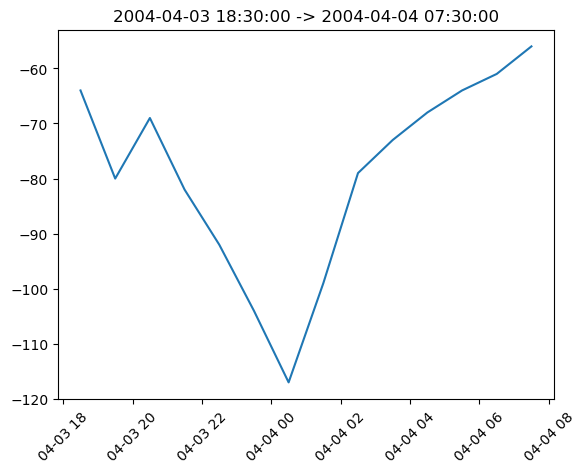

Storm peak length: 1 days 15:00:00


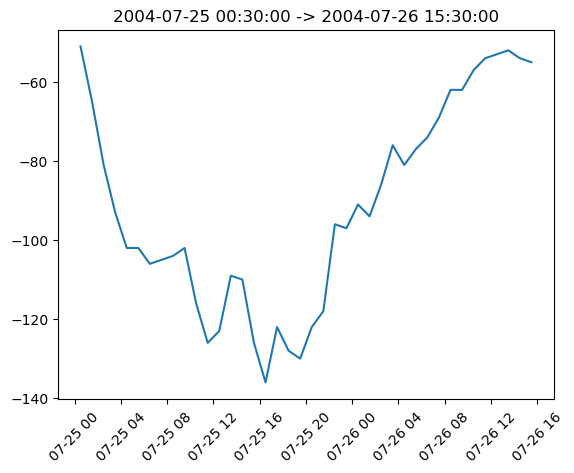

Storm peak length: 2 days 16:00:00


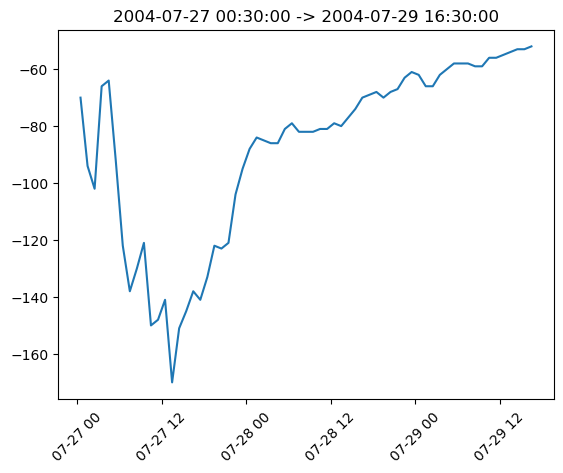

Storm peak length: 1 days 00:00:00


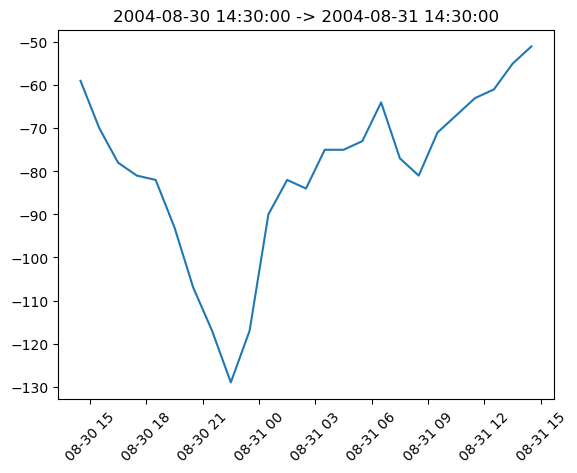

Storm peak length: 3 days 23:00:00


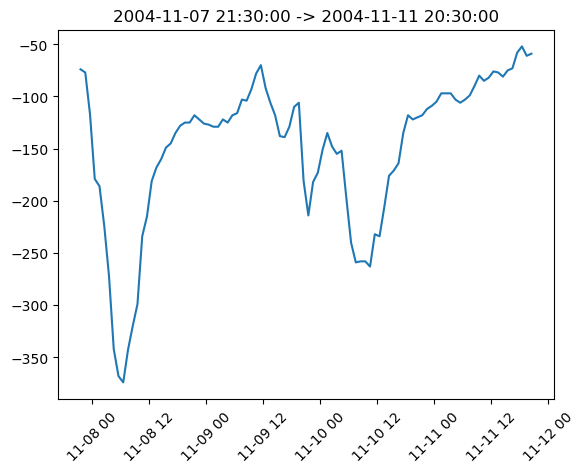

Storm peak length: 0 days 17:00:00


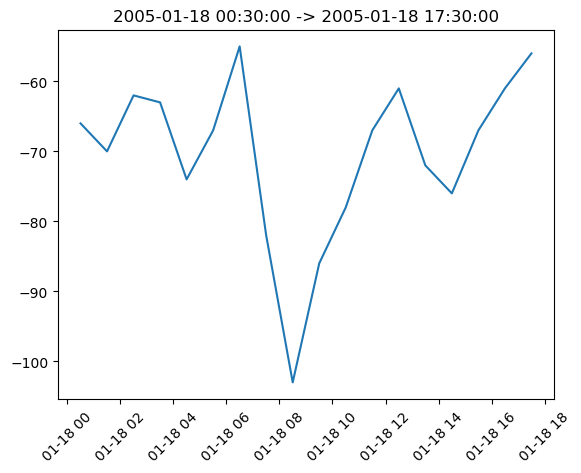

Storm peak length: 0 days 19:00:00


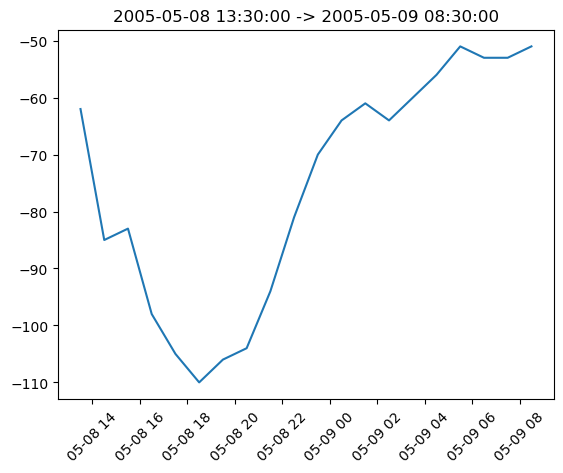

Storm peak length: 3 days 02:00:00


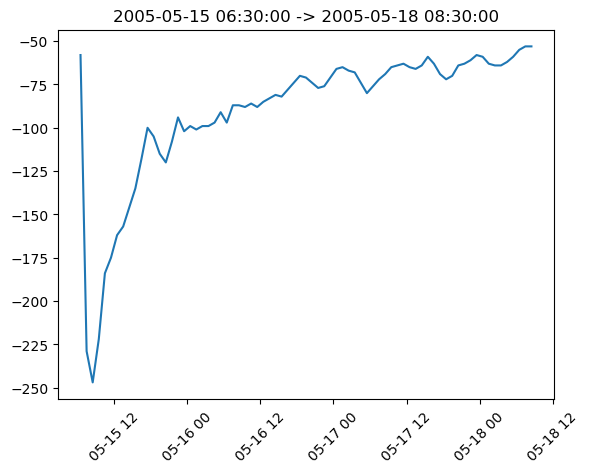

Storm peak length: 0 days 23:00:00


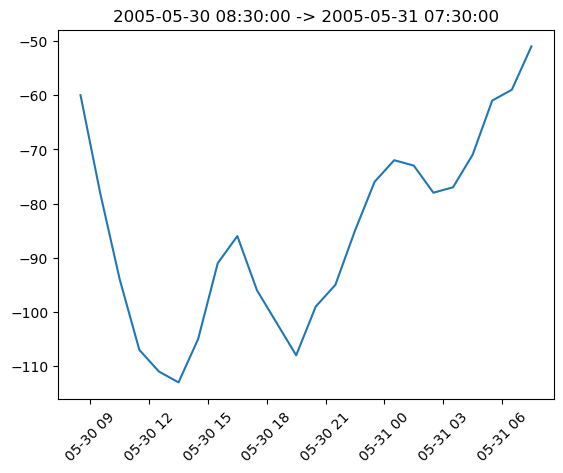

Storm peak length: 0 days 18:00:00


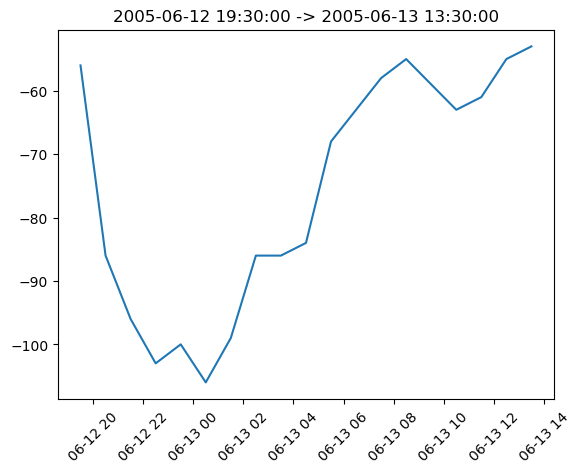

Storm peak length: 1 days 12:00:00


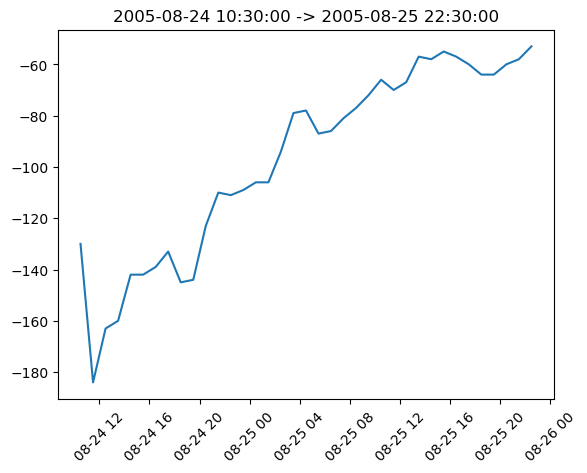

Storm peak length: 0 days 22:00:00


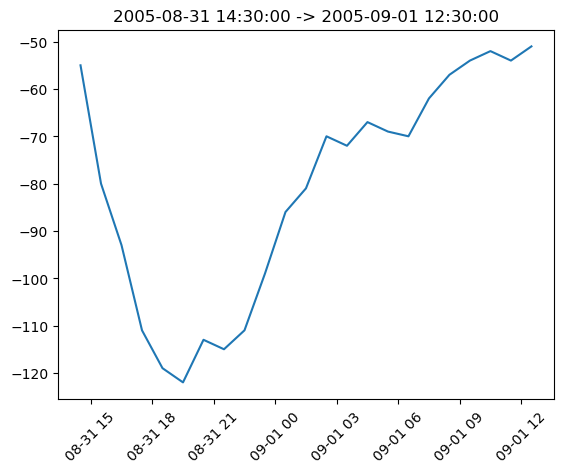

Storm peak length: 3 days 10:00:00


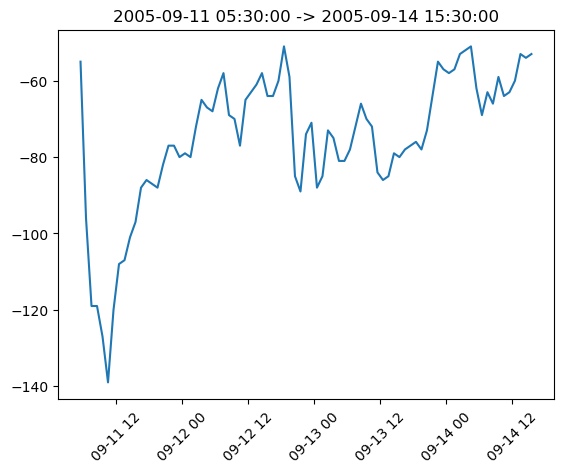

Storm peak length: 1 days 18:00:00


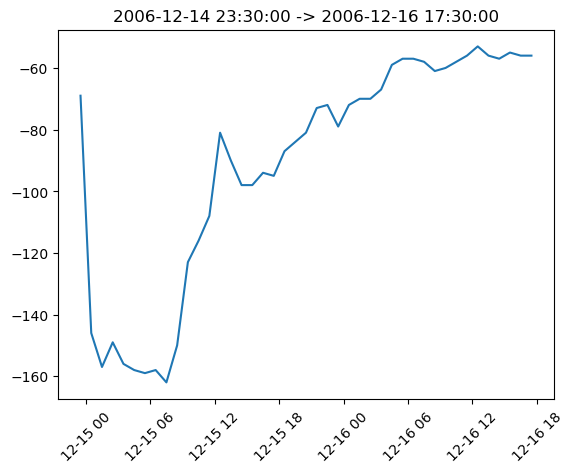

Storm peak length: 1 days 00:00:00


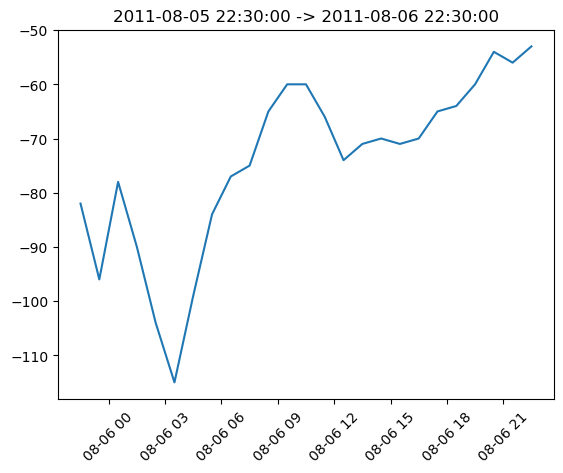

Storm peak length: 0 days 21:00:00


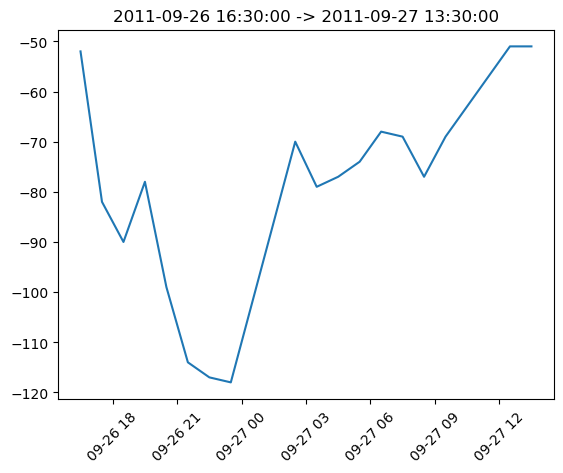

Storm peak length: 1 days 02:00:00


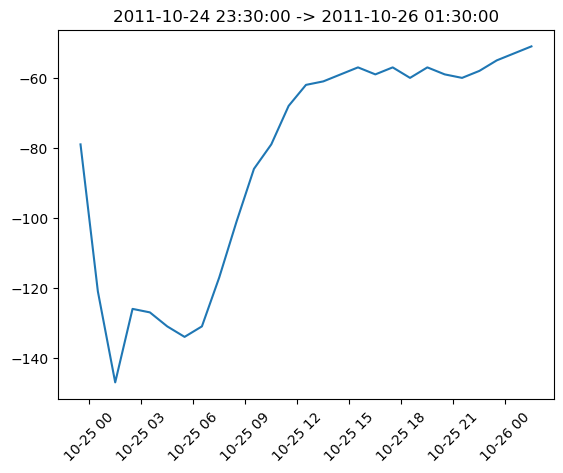

Storm peak length: 2 days 01:00:00


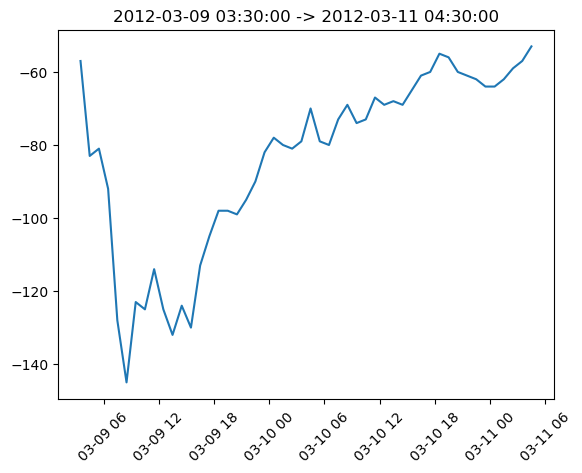

Storm peak length: 1 days 09:00:00


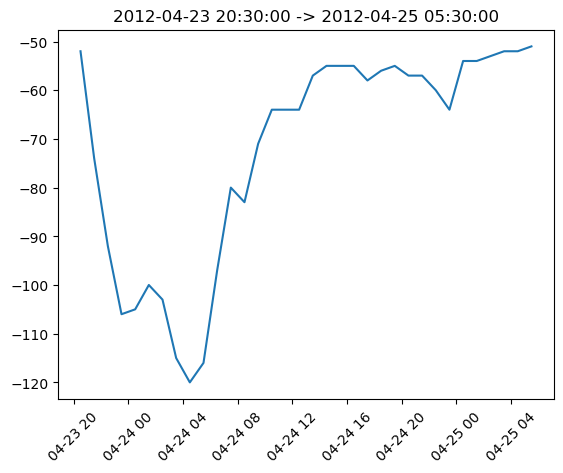

Storm peak length: 2 days 06:00:00


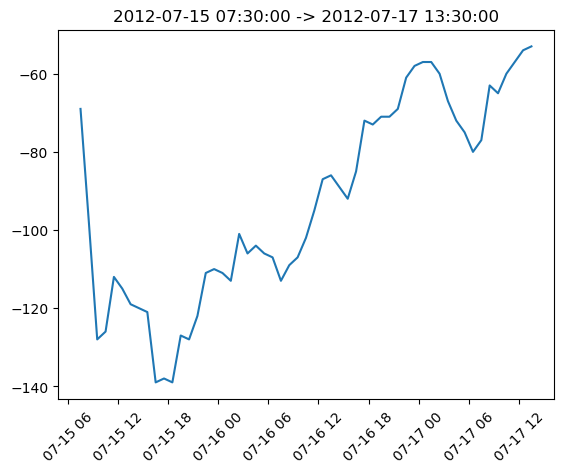

Storm peak length: 0 days 18:00:00


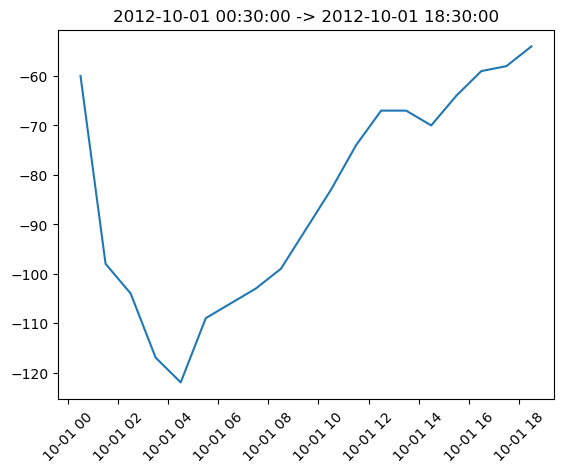

Storm peak length: 1 days 10:00:00


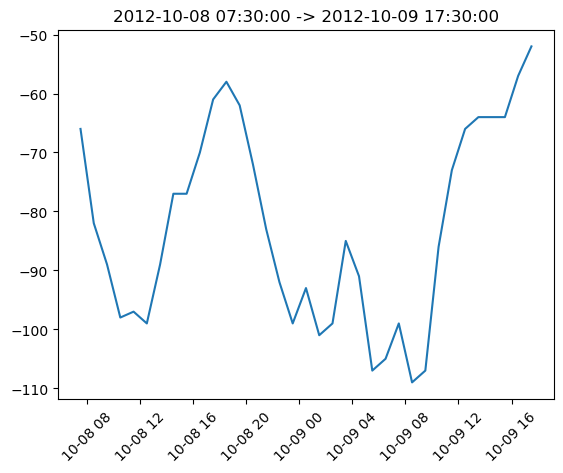

Storm peak length: 0 days 14:00:00


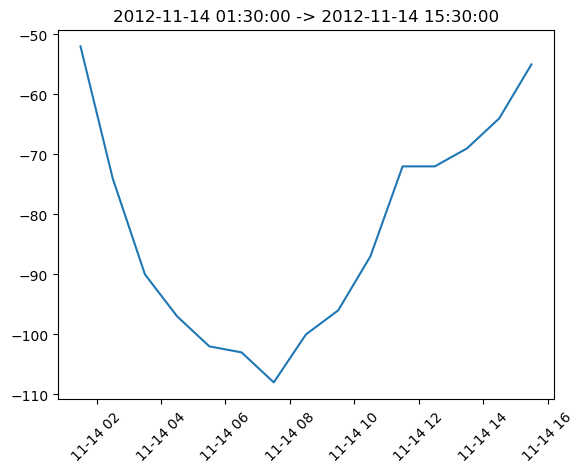

Storm peak length: 0 days 23:00:00


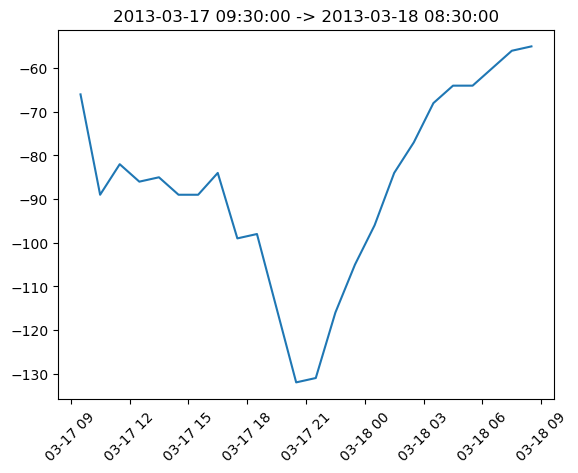

Storm peak length: 0 days 18:00:00


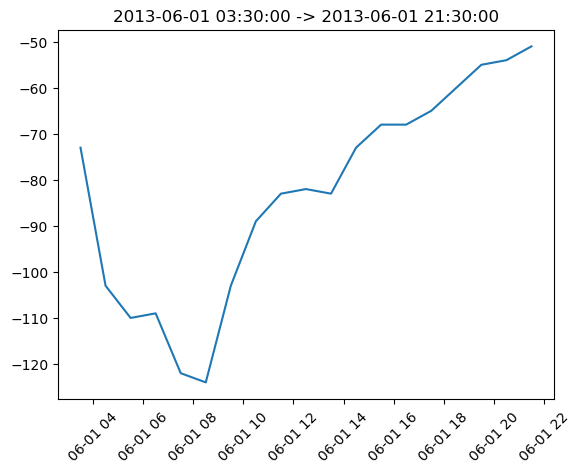

Storm peak length: 1 days 03:00:00


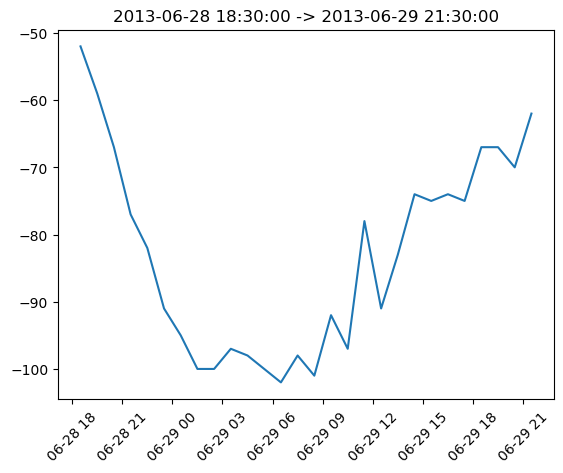

Storm peak length: 0 days 18:00:00


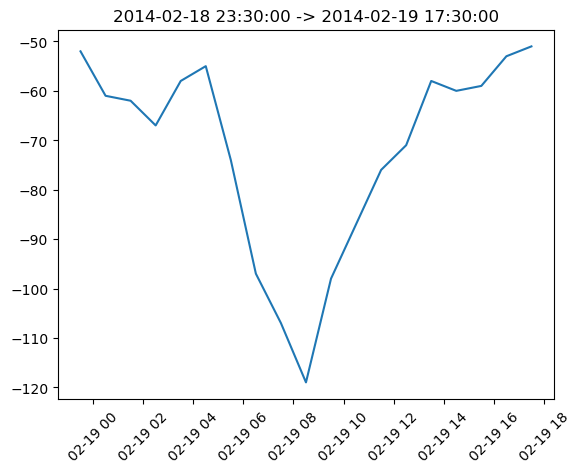

Storm peak length: 2 days 20:00:00


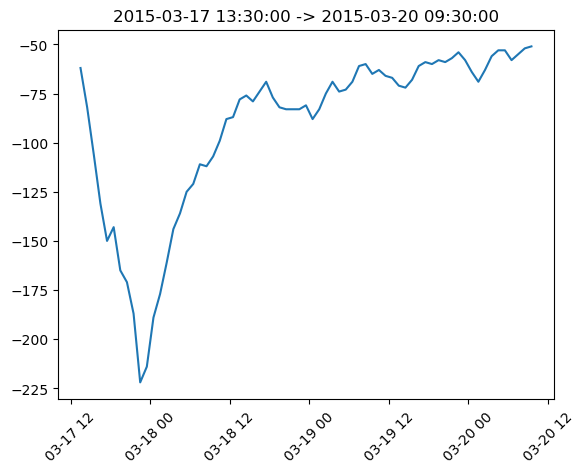

Storm peak length: 1 days 23:00:00


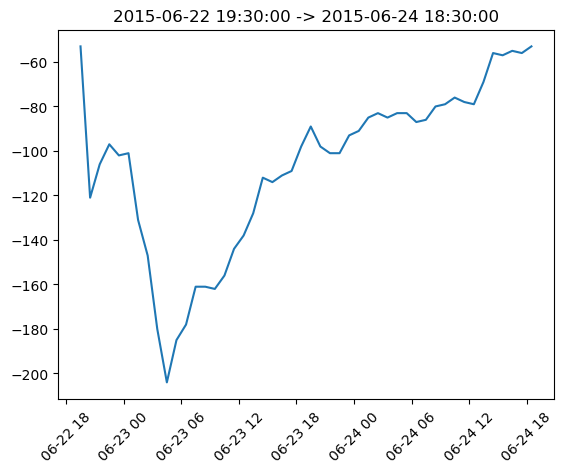

Storm peak length: 0 days 19:00:00


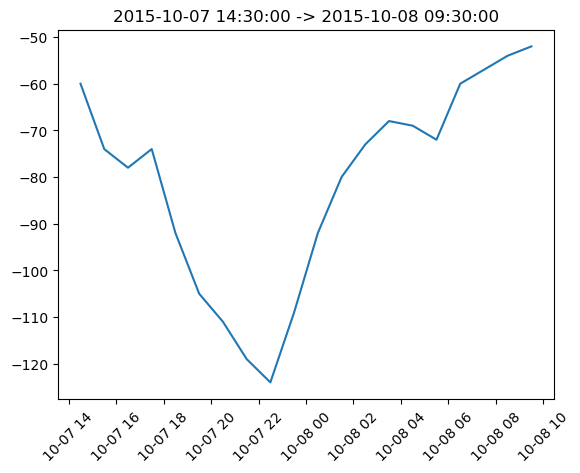

Storm peak length: 1 days 07:00:00


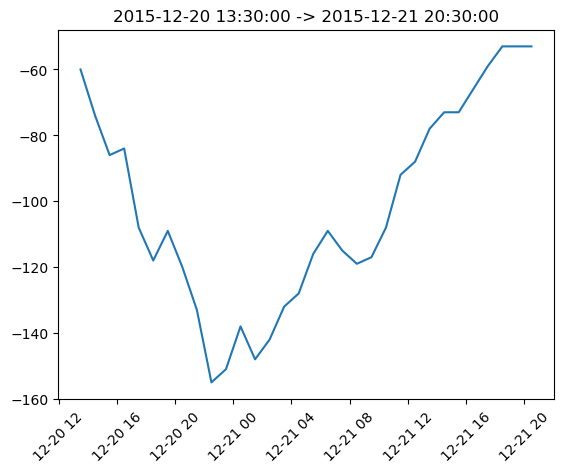

Storm peak length: 0 days 15:00:00


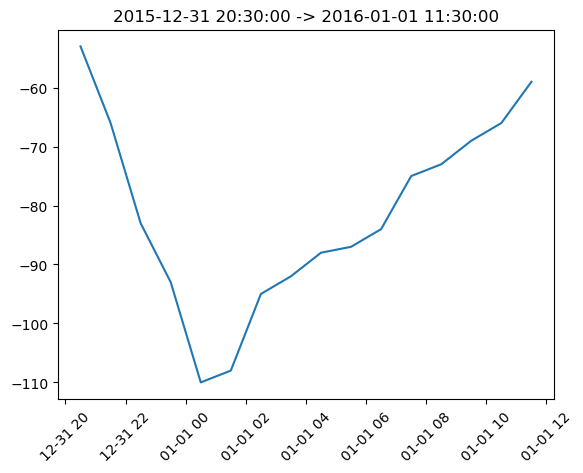

Storm peak length: 0 days 22:00:00


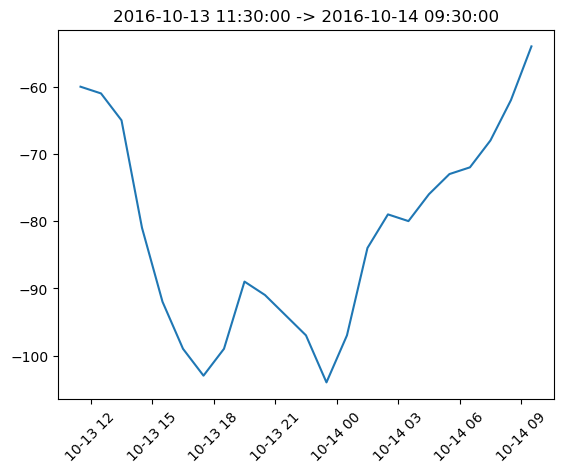

In [6]:
storms = []
for i in sorted(list(has_major_peak)):
    storm = df [df['storm_no'] == i]['dst']
    print('Storm peak length:', storm.index[-1] - storm.index[0])
    storms.append((storm.index[0], storm.index[-1]))
    plt.plot(storm)
    plt.title(f'{storm.index[0]} -> {storm.index[-1]}')
    plt.xticks(rotation=45)
    plt.show()    


In [7]:
storms_from_2003 = [storm for storm in storms if (storm[0] >= datetime(2003, 1, 1))]
storms_from_2003

[(Timestamp('2003-05-29 21:30:00'), Timestamp('2003-05-30 16:30:00')),
 (Timestamp('2003-06-18 05:30:00'), Timestamp('2003-06-19 02:30:00')),
 (Timestamp('2003-07-11 17:30:00'), Timestamp('2003-07-12 16:30:00')),
 (Timestamp('2003-08-18 04:30:00'), Timestamp('2003-08-19 10:30:00')),
 (Timestamp('2003-10-29 07:30:00'), Timestamp('2003-11-01 06:30:00')),
 (Timestamp('2003-11-20 13:30:00'), Timestamp('2003-11-22 09:30:00')),
 (Timestamp('2004-01-22 12:30:00'), Timestamp('2004-01-23 10:30:00')),
 (Timestamp('2004-04-03 18:30:00'), Timestamp('2004-04-04 07:30:00')),
 (Timestamp('2004-07-25 00:30:00'), Timestamp('2004-07-26 15:30:00')),
 (Timestamp('2004-07-27 00:30:00'), Timestamp('2004-07-29 16:30:00')),
 (Timestamp('2004-08-30 14:30:00'), Timestamp('2004-08-31 14:30:00')),
 (Timestamp('2004-11-07 21:30:00'), Timestamp('2004-11-11 20:30:00')),
 (Timestamp('2005-01-18 00:30:00'), Timestamp('2005-01-18 17:30:00')),
 (Timestamp('2005-05-08 13:30:00'), Timestamp('2005-05-09 08:30:00')),
 (Time

In [8]:
len(storms_from_2003)

40

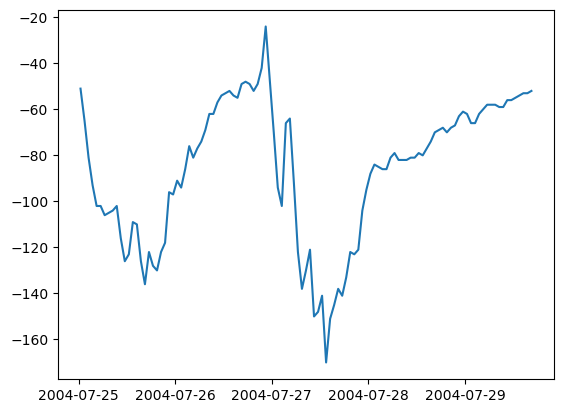

In [9]:
# Fusionner la tempête qui a moins de 1 jour d'écart avec la tempête suivante ? Non ça a l'air d'être 2 tempêtes différentes
plt.plot(df['dst'].loc[storms_from_2003[8][0]:storms_from_2003[9][1]])

In [10]:
min_peaks = []
for storm in storms_from_2003:
    min_peaks.append(np.min(df.loc[storm[0]:storm[1], 'dst']))

In [11]:
lstm_infos = {}
with open('merged_lstm.txt', 'r') as file:
    for line in file:
        line  = line.split(':')
        lstm_infos[line[0]] = eval(line[1])

In [12]:
seq2seq_infos = {}
with open('merged_seq2seq.txt', 'r') as file:
    for line in file:
        line  = line.split(':')
        seq2seq_infos[line[0]] = eval(line[1])

In [13]:
sarima_infos = {}
with open('merged_sarima.txt', 'r') as file:
    for line in file:
        line  = line.split(':')
        sarima_infos[line[0]] = eval(line[1])

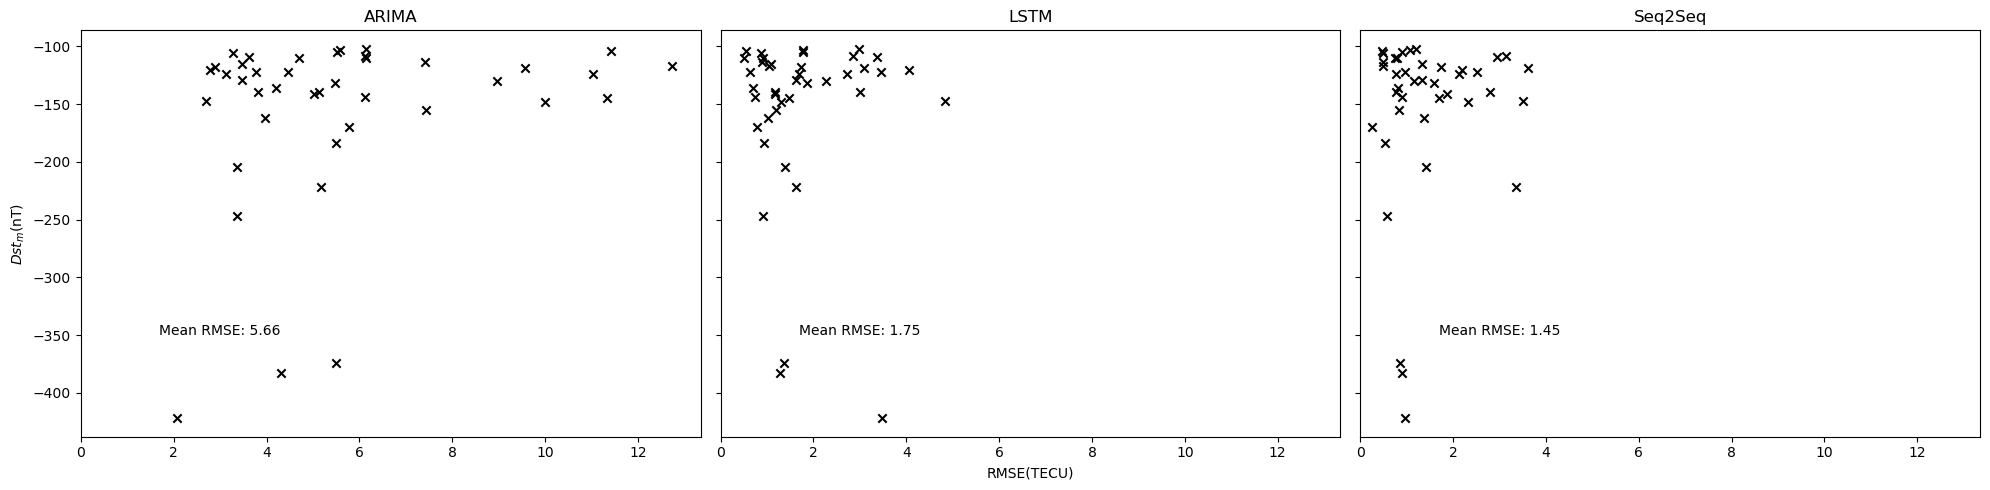

In [14]:
# Create figure and subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 5), sharey=True, sharex=True)

# First subplot
ax1.scatter(sarima_infos['sarima_rmse'], min_peaks, marker='x', color='k')
ax1.set_title('ARIMA')
ax1.text(3, -350, 'Mean RMSE: {}'.format(np.mean(sarima_infos['sarima_rmse']).round(2)), ha='center')
ax1.set_ylabel('$Dst_m$(nT)')

# Second subplot
ax2.scatter(lstm_infos['rmse'], min_peaks, marker='x', color='k')
ax2.set_title('LSTM')
ax2.text(3, -350, 'Mean RMSE: {}'.format(np.mean(lstm_infos['rmse']).round(2)), ha='center')
ax2.set_xlabel('RMSE(TECU)')
ax2.set_xlim(0, None) 

# Third subplot
ax3.scatter(seq2seq_infos['rmse'], min_peaks, marker='x', color='k')
ax3.text(3, -350, 'Mean RMSE: {}'.format(np.mean(seq2seq_infos['rmse']).round(2)), ha='center')
ax3.set_title('Seq2Seq')

# Adjust layout to prevent overlap
plt.tight_layout()  # Add bottom padding
plt.savefig('rmse.png')

# Display the plot
plt.show()

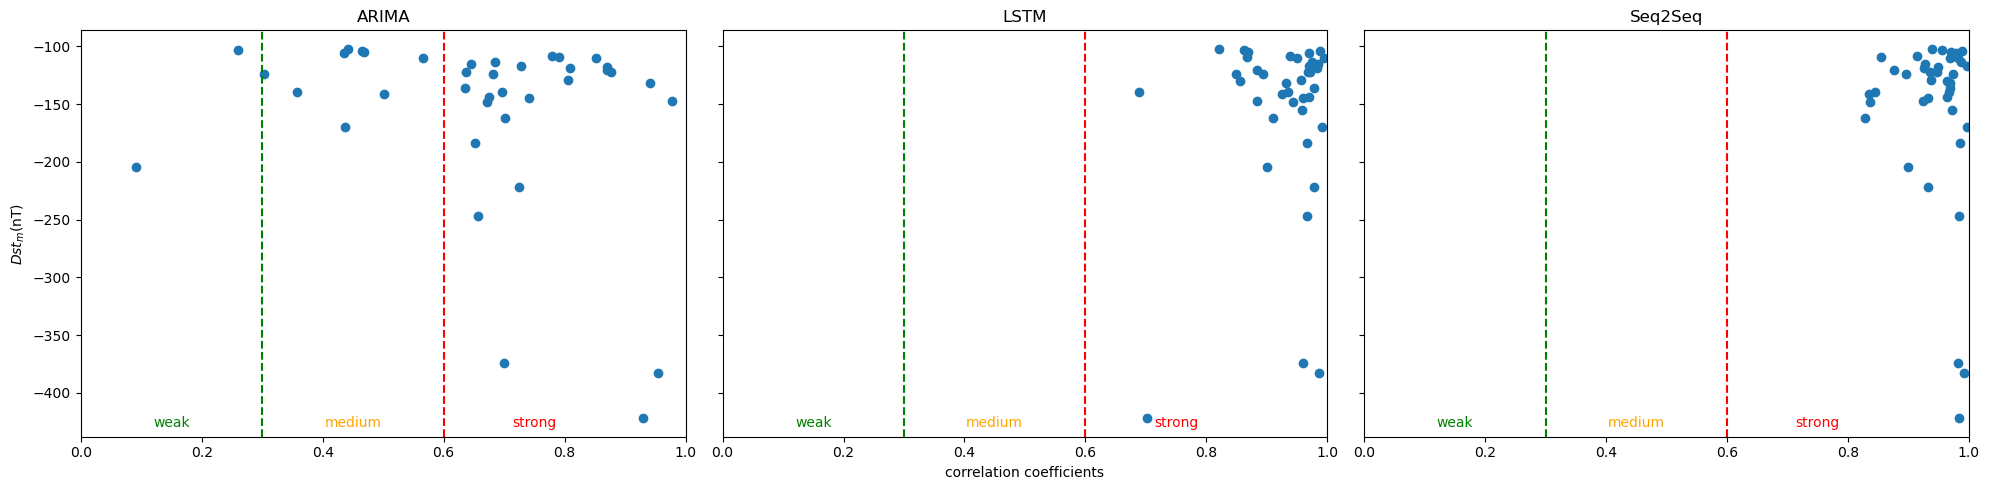

In [15]:
# Create figure and subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 5), sharey=True, sharex=True)

# First subplot
ax1.scatter(sarima_infos['sarima_correlation'], min_peaks)#, marker='x', color='k')
ax1.axvline(x=0.3, color='green', linestyle='--', label='x=0.3')
ax1.axvline(x=0.6, color='red', linestyle='--', label='x=0.6')
ax1.text(0.15, -430, 'weak', color='green', ha='center')
ax1.text(0.45, -430, 'medium', color='orange', ha='center')
ax1.text(0.75, -430, 'strong', color='red', ha='center')
ax1.set_title('ARIMA')
ax1.set_ylabel('$Dst_m$(nT)')

# Second subplot
ax2.scatter(lstm_infos['correlation'], min_peaks)
ax2.axvline(x=0.3, color='green', linestyle='--', label='x=0.3')
ax2.axvline(x=0.6, color='red', linestyle='--', label='x=0.6')
ax2.text(0.15, -430, 'weak', color='green', ha='center')
ax2.text(0.45, -430, 'medium', color='orange', ha='center')
ax2.text(0.75, -430, 'strong', color='red', ha='center')
ax2.set_title('LSTM')
ax2.set_xlabel('correlation coefficients')
ax2.set_xlim(0, 1) 

# Third subplot
ax3.scatter(seq2seq_infos['correlation'], min_peaks)
ax3.axvline(x=0.3, color='green', linestyle='--', label='x=0.3')
ax3.axvline(x=0.6, color='red', linestyle='--', label='x=0.6')
ax3.text(0.15, -430, 'weak', color='green', ha='center')
ax3.text(0.45, -430, 'medium', color='orange', ha='center')
ax3.text(0.75, -430, 'strong', color='red', ha='center')
ax3.set_title('Seq2Seq')

# Adjust layout to prevent overlap
plt.tight_layout()  # Add bottom padding
plt.savefig('correlation_coefs.png')

# Display the plot
plt.show()